## Question 1

Let's start by making the MDP

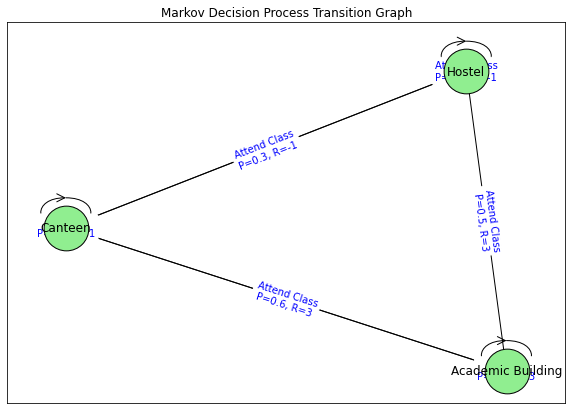

In [19]:
import matplotlib.pyplot as plt
import networkx as nx

# Defining the states, actions, transition probabilities, and rewards
locations = ['Hostel', 'Academic Building', 'Canteen']
decisions = ['Attend Class', 'Eat']

transitions = {
    'Hostel': {
        'Attend Class': [('Academic Building', 0.5, 3), ('Hostel', 0.5, -1)],
        'Eat': [('Canteen', 1.0, 1)]
    },
    'Academic Building': {
        'Attend Class': [('Academic Building', 0.7, 3), ('Canteen', 0.3, 1)],
        'Eat': [('Canteen', 0.8, 1), ('Academic Building', 0.2, 3)]
    },
    'Canteen': {
        'Attend Class': [('Academic Building', 0.6, 3), ('Hostel', 0.3, -1), ('Canteen', 0.1, 1)],
        'Eat': [('Canteen', 1.0, 1)]
    }
}

graph = nx.DiGraph()

for location in locations:
    graph.add_node(location)

for location in locations:
    for decision in decisions:
        for next_location, probability, reward in transitions[location][decision]:
            edge_label = f'{decision}\nP={probability}, R={reward}'
            graph.add_edge(location, next_location, label=edge_label)

positions = nx.spring_layout(graph, seed=42)

plt.figure(figsize=(10, 7))

nx.draw_networkx_nodes(graph, positions, node_size=2000, node_color='lightgreen', edgecolors='black')
nx.draw_networkx_edges(graph, positions, arrowstyle='->', arrowsize=20)
nx.draw_networkx_labels(graph, positions, font_size=12, font_family='sans-serif')

edge_labels = nx.get_edge_attributes(graph, 'label')
nx.draw_networkx_edge_labels(graph, positions, edge_labels=edge_labels, font_color='blue')

plt.title('Markov Decision Process Transition Graph')
plt.show()

In [3]:
import numpy as np

# Defining the states and actions for the Markov Decision Process (MDP)
states = ['H', 'A', 'C']
actions = ['Attend Class', 'Eat']

# Transition probabilities and rewards for each state-action pair
transitions = {
    'H': {
        'Attend Class': [('A', 0.5, 3), ('H', 0.5, -1)],
        'Eat': [('C', 1.0, 1)]
    },
    'A': {
        'Attend Class': [('A', 0.7, 3), ('C', 0.3, 1)],
        'Eat': [('C', 0.8, 1), ('A', 0.2, 3)]
    },
    'C': {
        'Attend Class': [('A', 0.6, 3), ('H', 0.3, -1), ('C', 0.1, 1)],
        'Eat': [('C', 1.0, 1)]
    }
}

# Initializing value functions for each state
value_function = {state: 0 for state in states}

# Discounting
discount_factor = 0.9

# Function for performing value iteration to compute the optimal value function
def perform_value_iteration(transitions, value_function, discount_factor, threshold=1e-6):
    while True:
        max_change = 0
        for state in states:
            current_value = value_function[state]
            estimated_action_values = []
            
            # Evaluating the values for each possible action
            for action in actions:
                total_value = sum(prob * (reward + discount_factor * value_function[next_state])
                                  for next_state, prob, reward in transitions[state][action])
                estimated_action_values.append(total_value)
            
            # Update the value function with the best action's value
            value_function[state] = max(estimated_action_values)
            max_change = max(max_change, abs(current_value - value_function[state]))
        
        # If the maximum change is below the threshold, the algorithm has converged
        if max_change < threshold:
            break
    
    return value_function

# Function for extracting the optimal policy based on the computed value function
def derive_optimal_policy(transitions, value_function, discount_factor):
    optimal_policy = {}
    
    for state in states:
        action_values = {}
        for action in actions:
            action_value = sum(prob * (reward + discount_factor * value_function[next_state])
                               for next_state, prob, reward in transitions[state][action])
            action_values[action] = action_value
        
        # Choosing the action with the highest expected value
        optimal_policy[state] = max(action_values, key=action_values.get)
    
    return optimal_policy

optimal_values = perform_value_iteration(transitions, value_function, discount_factor)
optimal_policy = derive_optimal_policy(transitions, optimal_values, discount_factor)

print("Optimal Values for each state:")
for state in states:
    print(f"State {state}: {optimal_values[state]:.2f}")

print("\nOptimal Policy:")
for state in states:
    print(f"State {state}: {optimal_policy[state]}")

Optimal Values for each state:
State H: 18.95
State A: 20.94
State C: 19.81

Optimal Policy:
State H: Attend Class
State A: Attend Class
State C: Attend Class


In [6]:
import numpy as np

# Define the states and actions
states = ['H', 'A', 'C']
actions = ['Attend Class', 'Eat']

# Define the transition probabilities and rewards
transitions = {
    'H': {
        'Attend Class': [('A', 0.5, 3), ('H', 0.5, -1)],
        'Eat': [('C', 1.0, 1)]
    },
    'A': {
        'Attend Class': [('A', 0.7, 3), ('C', 0.3, 1)],
        'Eat': [('C', 0.8, 1), ('A', 0.2, 3)]
    },
    'C': {
        'Attend Class': [('A', 0.6, 3), ('H', 0.3, -1), ('C', 0.1, 1)],
        'Eat': [('C', 1.0, 1)]
    }
}

current_policy = {state: np.random.choice(actions) for state in states}


discount_factor = 0.9 #discounting

def evaluate_policy(policy, transitions, discount_factor, epsilon=1e-6):
    value_function = {state: 0 for state in states}
    while True:
        max_diff = 0
        for state in states:
            current_value = value_function[state]
            selected_action = policy[state]
            value_function[state] = sum(prob * (reward + discount_factor * value_function[next_state])
                                        for next_state, prob, reward in transitions[state][selected_action])
            max_diff = max(max_diff, abs(current_value - value_function[state]))
        if max_diff < epsilon:
            break
    return value_function

def improve_policy(value_function, transitions, discount_factor):
    policy_is_stable = True
    for state in states:
        best_action = current_policy[state]
        action_estimates = {}
        for action in actions:
            expected_value = sum(prob * (reward + discount_factor * value_function[next_state])
                                 for next_state, prob, reward in transitions[state][action])
            action_estimates[action] = expected_value
        current_policy[state] = max(action_estimates, key=action_estimates.get)
        if best_action != current_policy[state]:
            policy_is_stable = False
    return policy_is_stable

def iterate_policy(transitions, discount_factor):
    while True:
        value_function = evaluate_policy(current_policy, transitions, discount_factor)
        is_stable = improve_policy(value_function, transitions, discount_factor)
        if is_stable:
            break
    return current_policy

optimal_policy = iterate_policy(transitions, discount_factor)

print("Optimal Policy:")
for state in states:
    print(f"State {state}: {optimal_policy[state]}")

Optimal Policy:
State H: Attend Class
State A: Attend Class
State C: Attend Class


1.3) The optimal values derived through value iteration indicate that prioritizing actions leading to the Academic Building is generally more advantageous in terms of maximizing rewards. The optimal policy obtained from policy iteration also verifies these findings by recommending activities that promote transitioning to states with higher predicted future benefits.

## Question 2

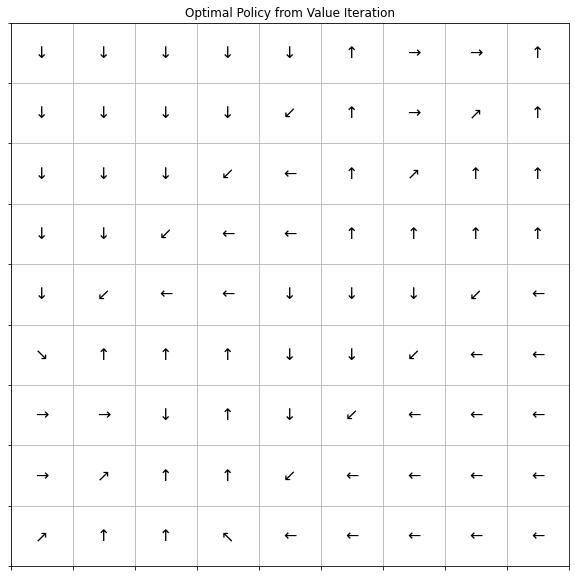

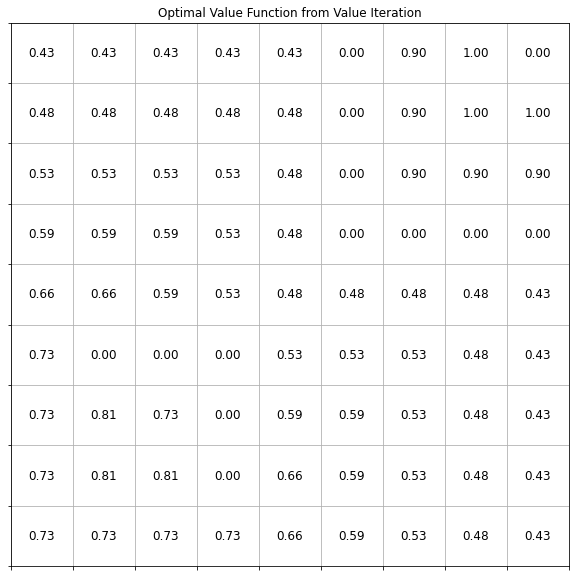

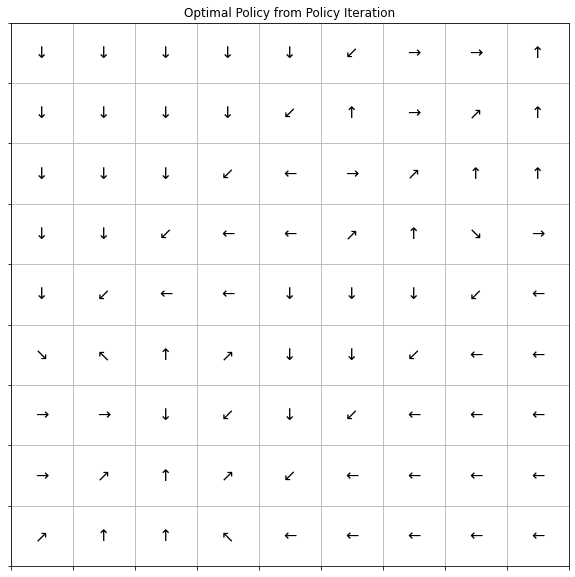

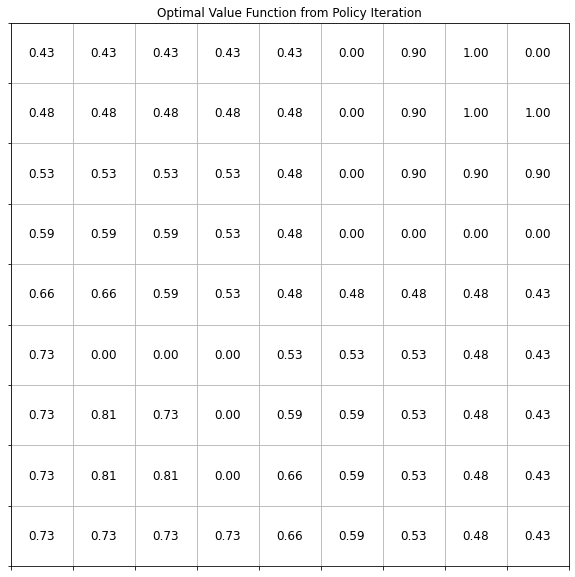

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def plot_grid_values(grid_values, title):
    plt.figure(figsize=(10, 10))
    plt.title(title)
    
    for i in range(grid_size):
        for j in range(grid_size):
            state_value = grid_values[i, j]
            plt.text(j, i, f'{state_value:.2f}', ha='center', va='center', fontsize=12, color='black')
    
    plt.xlim(-0.5, grid_size - 0.5)
    plt.ylim(-0.5, grid_size - 0.5)
    plt.xticks(np.arange(-0.5, grid_size, 1), [])
    plt.yticks(np.arange(-0.5, grid_size, 1), [])
    plt.gca().invert_yaxis()
    plt.grid(True)
    plt.show()

def plot_grid_policy(grid_policy, title):
    plt.figure(figsize=(10, 10))
    plt.title(title)
    
    direction_arrows = ['↑', '↓', '←', '→', '↖', '↗', '↙', '↘']
    
    for i in range(grid_size):
        for j in range(grid_size):
            state_action = grid_policy[i, j]
            plt.text(j, i, direction_arrows[state_action], ha='center', va='center', fontsize=16, color='black')
    
    plt.xlim(-0.5, grid_size - 0.5)
    plt.ylim(-0.5, grid_size - 0.5)
    plt.xticks(np.arange(-0.5, grid_size, 1), [])
    plt.yticks(np.arange(-0.5, grid_size, 1), [])
    plt.gca().invert_yaxis()
    plt.grid(True)
    plt.show()

value_policy, value_function = value_iteration()
policy_policy, policy_function = policy_iteration()

value_policy_grid = value_policy.reshape((grid_size, grid_size))
value_function_grid = value_function.reshape((grid_size, grid_size))
policy_policy_grid = policy_policy.reshape((grid_size, grid_size))
policy_function_grid = policy_function.reshape((grid_size, grid_size))

plot_grid_policy(value_policy_grid, "Optimal Policy from Value Iteration")
plot_grid_values(value_function_grid, "Optimal Value Function from Value Iteration")
plot_grid_policy(policy_policy_grid, "Optimal Policy from Policy Iteration")
plot_grid_values(policy_function_grid, "Optimal Value Function from Policy Iteration")

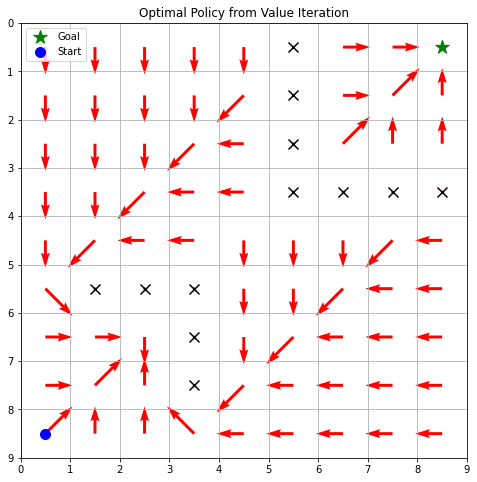

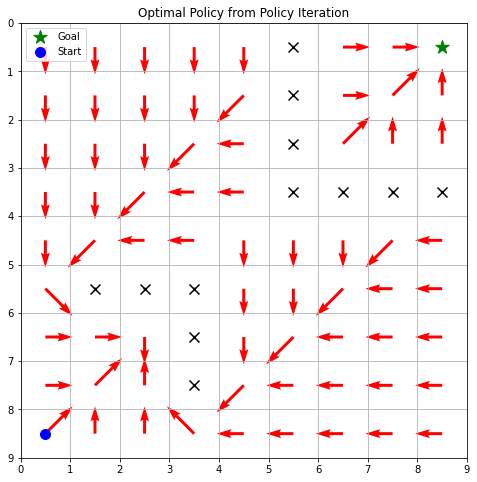

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Configuration and setup
grid_size = 9
num_states = grid_size * grid_size

goal_state = 8
blocked_cells = [5, 14, 23, 32, 33, 34, 35, 46, 47, 48, 57, 66]
in_tunnel = 56
out_tunnel = 24
start_state = 72

rewards = np.zeros(num_states)
rewards[goal_state] = 1

actions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]
num_actions = len(actions)

def get_next_state(state, action):
    row = state // grid_size
    col = state % grid_size
    new_row = row + action[0]
    new_col = col + action[1]
    
    if new_row < 0 or new_row >= grid_size or new_col < 0 or new_col >= grid_size:
        return state  
    
    next_state = new_row * grid_size + new_col
    if next_state in blocked_cells:
        return state  
    
    if next_state == in_tunnel:
        return out_tunnel  
    
    return next_state

action_vectors = {
    0: (-1, 0),  
    1: (1, 0),   
    2: (0, -1),   
    3: (0, 1),    
    4: (-1, -1),  
    5: (-1, 1),   
    6: (1, -1),   
    7: (1, 1)    
}

def value_iteration(gamma=0.9, theta=1e-5):
    value_function = np.zeros(num_states)
    
    while True:
        delta = 0
        new_value_function = np.zeros(num_states)
        
        for state in range(num_states):
            if state in blocked_cells or state == goal_state:
                continue
            
            max_value = float('-inf')
            for action in actions:
                next_state = get_next_state(state, action)
                value = rewards[next_state] + gamma * value_function[next_state]
                if value > max_value:
                    max_value = value
            
            new_value_function[state] = max_value
            delta = max(delta, abs(value_function[state] - new_value_function[state]))
        
        value_function = new_value_function
        
        if delta < theta:
            break
    
    policy = np.zeros(num_states, dtype=int)
    for state in range(num_states):
        if state in blocked_cells or state == goal_state:
            continue
        
        max_value = float('-inf')
        best_action = 0
        for i, action in enumerate(actions):
            next_state = get_next_state(state, action)
            value = rewards[next_state] + gamma * value_function[next_state]
            if value > max_value:
                max_value = value
                best_action = i
        
        policy[state] = best_action
    
    return policy, value_function

def policy_iteration(gamma=0.9, theta=1e-5):
    policy = np.random.choice(num_actions, num_states)
    value_function = np.zeros(num_states)
    
    while True:
    
        while True:
            delta = 0
            for state in range(num_states):
                if state in blocked_cells or state == goal_state:
                    continue
                
                action = actions[policy[state]]
                next_state = get_next_state(state, action)
                value = rewards[next_state] + gamma * value_function[next_state]
                delta = max(delta, abs(value_function[state] - value))
                value_function[state] = value
            
            if delta < theta:
                break
        
        
        policy_stable = True
        for state in range(num_states):
            if state in blocked_cells or state == goal_state:
                continue
            
            old_action = policy[state]
            max_value = float('-inf')
            best_action = old_action
            for i, action in enumerate(actions):
                next_state = get_next_state(state, action)
                value = rewards[next_state] + gamma * value_function[next_state]
                if value > max_value:
                    max_value = value
                    best_action = i
            
            policy[state] = best_action
            if best_action != old_action:
                policy_stable = False
        
        if policy_stable:
            break
    
    return policy, value_function

value_policy, value_function = value_iteration()
policy_policy, policy_function = policy_iteration()

def visualize_policy(policy, title):
    X, Y = np.meshgrid(np.arange(grid_size), np.arange(grid_size))
    U = np.zeros_like(X, dtype=float)
    V = np.zeros_like(Y, dtype=float)
    
    for state in range(num_states):
        if state in blocked_cells or state == goal_state:
            continue
        row = state // grid_size
        col = state % grid_size
        action = policy[state]
        direction = action_vectors[action]
        U[row, col] = direction[1]
        V[row, col] = -direction[0]  
    
    plt.figure(figsize=(8, 8))
    plt.quiver(X + 0.5, Y + 0.5, U, V, color='r')  # Adjust position of arrows
    plt.scatter(goal_state % grid_size + 0.5, goal_state // grid_size + 0.5, color='g', marker='*', s=200, label='Goal')
    plt.scatter(start_state % grid_size + 0.5, start_state // grid_size + 0.5, color='b', marker='o', s=100, label='Start')
    for blocked in blocked_cells:
        plt.scatter(blocked % grid_size + 0.5, blocked // grid_size + 0.5, color='black', marker='x', s=100)
    plt.xlim(0, grid_size)
    plt.ylim(0, grid_size)
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

visualize_policy(value_policy, "Optimal Policy from Value Iteration")
visualize_policy(policy_policy, "Optimal Policy from Policy Iteration")